In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob
import pandas as pd

Determine the fractional size of the largest connected forest for each of
the Ntests, and find the average of these, Savg

In [62]:
def find_Savg(exp_dict:dict):
    S_avg = {}
    for key in exp_dict.keys():
        S_avg[key] = np.mean(exp_dict[key])
    return S_avg

/Users/kks/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kks/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


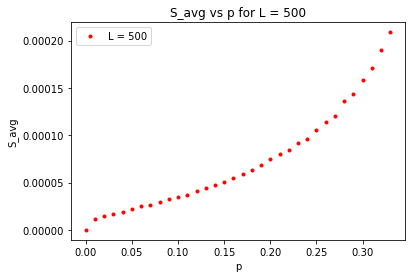

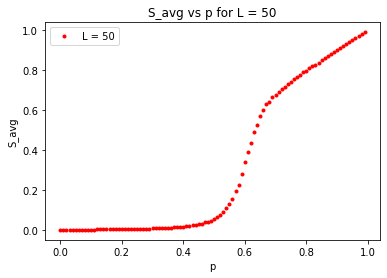

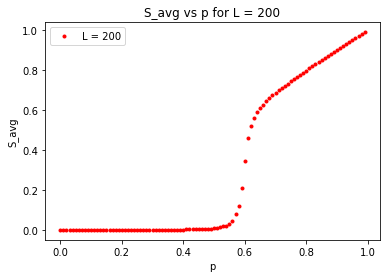

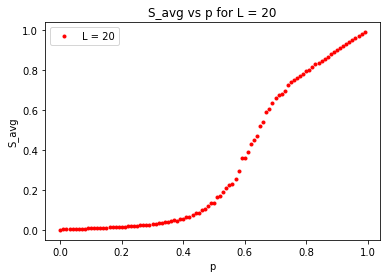

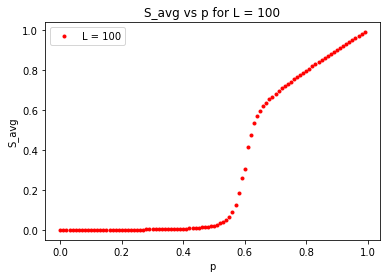

In [63]:
# open dict L = 50
file_names = glob.glob("percolation_experiment*.pickle")
for file_name in file_names:
    exp = file_name.replace("percolation_experiment_", "")
    L = exp.replace(".pickle", "")
    exp_file = open(file_name, 'rb')
    exp = pickle.load(exp_file)
    exp_file.close()
    S_avg = find_Savg(exp)
    plot_S_avg_function_of_p(S_avg, L, True)

In [11]:
def find_Savg(exp_dict:dict):
    S_avg = {}
    for key in exp_dict.keys():
        S_avg[key] = np.mean(exp_dict[key])
    return S_avg

In [ ]:
S_avg_10 = find_Savg(exp_L10)


In [ ]:
# On a single figure, for each L, plot the average Savg as a function of p.

In [17]:
def plot_S_avg_function_of_p(S_avg_p:dict, L:int, save = False):
    fig, ax = plt.subplots()
    x_data = list(S_avg_p.keys())
    y_data = list(S_avg_p.values())
    ax.plot(x_data, y_data, 'r.', label = "L = "+str(L))
    ax.legend()
    title_str = "S_avg vs p for L = "+str(L)
    ax.set_xlabel("p")
    ax.set_ylabel("S_avg")
    ax.set_title(title_str)
    if save:
        plt.savefig("S_avg_vs_p_for_N_"+str(L)+".png")
    plt.show()

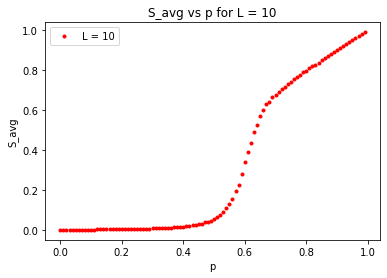

In [18]:
plot_S_avg_function_of_p(S_avg_10, 10, True)

# P5: 
a) Using your model from the previous question and your estimate of pc, plot
the distribution of forest sizes (meaning cluster sizes) for p ≃ pc for the
largest L your code and psychological makeup can withstand. (You can
average the distribution over separate simulations.)
Comment on what kind of distribution you find.
(b) Repeat the above for p = pc/2 and p = pc + (1 − pc)/2, i.e., well below and
well above pc.
Produce plots for both cases, and again, comment on what you find

In [35]:
p_c = 0.6
p_vals = [p_c, p_c/2.0,  p_c + (1 - p_c)/2.0]

In [50]:
def compute_average_of_groups_list(groups_list):
    average_dict = {}
    for group in groups_list:
        for key in group.keys():
            if key in average_dict:
                average_dict[key] += group[key]
            else:
                average_dict[key] = group[key]
    average_dict = {k: v/len(groups_list) for k,v in average_dict.items()}
    return average_dict

In [55]:
pc_exp_file_name = glob.glob("./percolation_critical_analysis_L500.pickle")
pc_exp_file = open(pc_exp_file_name[0], 'rb')
pc_exp = pickle.load(pc_exp_file)
pc_exp_file.close()

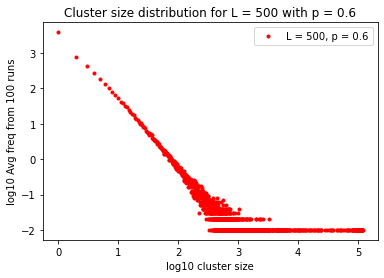

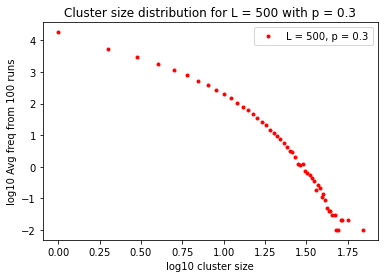

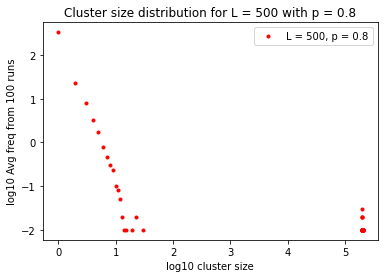

In [58]:
# case pc_exp = pc
# plot distribution of cluster sizes averaging over simulation 100 sims
for p in p_vals:
    pc_exp_i = pc_exp[p]
    pc_exp_i = [{k:v for k,v in sorted(d.items(), key=lambda t: t[0])} for d in pc_exp_i]
    average_pc_exp = compute_average_of_groups_list(pc_exp_i)
    fig, ax = plt.subplots()
    x_data = list(average_pc_exp.keys())
    y_data = list(average_pc_exp.values())
    ax.plot(np.log10(x_data), np.log10(y_data), 'r.', label = "L = 500, p = "+str(p))
    ax.legend()
    title_str = "Cluster size distribution for L = 500 with p = "+str(p)
    ax.set_xlabel("log10 cluster size")
    ax.set_ylabel("log10 Avg freq from 100 runs")
    ax.set_title(title_str)
    plt.savefig("cluster_size_distribution_L500_pc_ "+str(p)+".png")
    plt.show()